<img src='../../images/wcd_logo.png' width='50%'>
-------------

<h3 align='center'> WCD Python Data Science Course </h3>
<h1 align='center'> Machine learning: regression </h1>

<br>
<center align="left"> Developed by: </center>
<center align="left"> WeCloudData Academy </center>

In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load the data

In [2]:
from sklearn import datasets

X, y = datasets.load_boston(return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
boston = datasets.load_boston()

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
print(boston)

{'data': array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]), 'target': array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.

# Explore the data: histograms

In [9]:
df = pd.DataFrame(boston.data, columns=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


88.9762


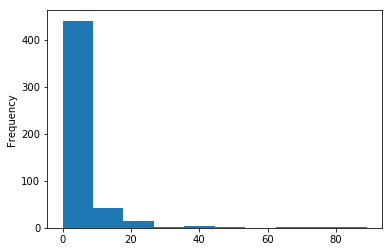

In [10]:
df['CRIM'].plot.hist()
print(df['CRIM'].max())

In [11]:
y = boston.target
print(y)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

(array([  9.,  12.,  18.,  37.,  40.,  42.,  83.,  71.,  72.,  12.,  23.,
         18.,  16.,  14.,   7.,   1.,   5.,   5.,   2.,  19.]),
 array([  5.  ,   7.25,   9.5 ,  11.75,  14.  ,  16.25,  18.5 ,  20.75,
         23.  ,  25.25,  27.5 ,  29.75,  32.  ,  34.25,  36.5 ,  38.75,
         41.  ,  43.25,  45.5 ,  47.75,  50.  ]),
 <a list of 20 Patch objects>)

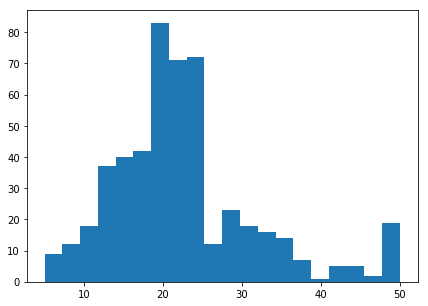

In [47]:
hist(y,bins=20)

# Linear regression
[link](https://en.wikipedia.org/wiki/Linear_regression)

In [13]:
from sklearn.linear_model import LinearRegression

LinearRegression?

In [14]:
lr = LinearRegression()
print(lr.fit(df, y))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [15]:
y_pred = lr.predict(df)
print(type(y_pred))

<class 'numpy.ndarray'>


In [16]:
zip(y_pred, y)

In [17]:
for i in zip(y_pred,y):
    print(i)

(30.008212692344891, 24.0)
(25.029860603819042, 21.600000000000001)
(30.570231695891898, 34.700000000000003)
(28.608140549202581, 33.399999999999999)
(27.94288231932077, 36.200000000000003)
(25.2594004793783, 28.699999999999999)
(23.004339941026576, 22.899999999999999)
(19.534755802206544, 27.100000000000001)
(11.516965391483502, 16.5)
(18.919814830982993, 18.899999999999999)
(18.995826599304028, 15.0)
(21.58970853723018, 18.899999999999999)
(20.905348512348496, 21.699999999999999)
(19.555359306743778, 20.399999999999999)
(19.283795700376423, 18.199999999999999)
(19.30000174440498, 19.899999999999999)
(20.528899934974355, 23.100000000000001)
(16.909674898646287, 17.5)
(16.170674106084203, 20.199999999999999)
(18.407816357002162, 18.199999999999999)
(12.520404544697548, 13.6)
(17.671045654953868, 19.600000000000001)
(15.829348906953495, 15.199999999999999)
(13.80368317247158, 14.5)
(15.677081383419143, 15.6)
(13.379164499389148, 13.9)
(15.462588290847162, 16.600000000000001)
(14.6986360

(18.520119872223873, 20.800000000000001)
(13.137074572062268, 13.4)
(14.596626012436449, 11.699999999999999)
(9.8923748990081961, 8.3000000000000007)
(16.319980484720677, 10.199999999999999)
(14.067503009748929, 10.9)
(14.225735677136903, 11.0)
(13.00752250688009, 9.5)
(18.132775466923206, 14.5)
(18.666454961627089, 14.1)
(21.502837953394874, 16.100000000000001)
(17.000393790016815, 14.300000000000001)
(15.939266017124879, 11.699999999999999)
(13.329527160057356, 13.4)
(14.489492108908003, 9.5999999999999996)
(8.7836673082018208, 8.6999999999999993)
(4.8300317049747008, 8.4000000000000004)
(13.061155281235898, 12.800000000000001)
(12.711014724342736, 10.5)
(17.288762403965769, 17.100000000000001)
(18.73424906139935, 18.399999999999999)
(18.052710131505364, 15.4)
(11.498556118530349, 10.800000000000001)
(13.008415122982417, 11.800000000000001)
(17.669755765538568, 14.9)
(18.123422937864575, 12.6)
(17.51503230722021, 14.1)
(17.213072033212345, 13.0)
(16.482385430651995, 13.4)
(19.4007973

# Evaluate using mean absolute value and [r2_score](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)

In [18]:
from sklearn import metrics

print(metrics.mean_absolute_error(y, y_pred))
print(metrics.r2_score(y, y_pred))

3.272944638
0.740607742865


In [19]:
scatter?

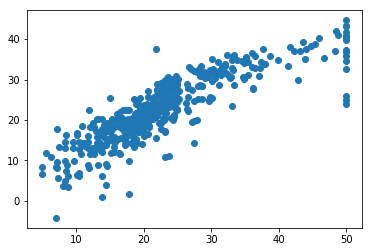

In [20]:
scatter(y=y_pred, x=y)

# Great numbers BUT, what is the catch?
The model already "knows" the labels: it's cheating!

# Split train-test sets

In [21]:
from sklearn.model_selection import train_test_split

train_test_split?

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


# Bigger quiz
* Train a new linear regression model on X_train, y_train
* Predict y_pred on X_test
* Scatter plot y_pred, y_test
* calculate mean absolute error and r2 score

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
zip(y_pred, y)

In [26]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))

3.54377196382
0.726204971106


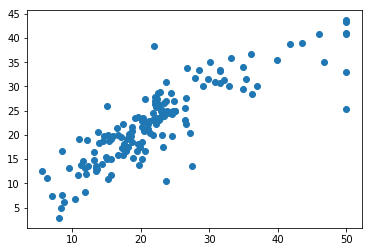

In [27]:
scatter(y=y_pred, x=y_test)

# Model comparison
* Linear regression
* Lasso regression: linear regression with L1 regularization
* SVM regression
* Decision tree regression

In [28]:
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [29]:
Lasso?

In [30]:
SVR?

In [31]:
DecisionTreeRegressor?

In [32]:
lasso = Lasso()
svr = SVR()
dtr = DecisionTreeRegressor()

models = (lr, lasso, svr, dtr)

for model in models:
    model.fit(X_train, y_train)

In [33]:
y_preds = [model.predict(X_test) for model in models]

In [34]:
y_preds

[array([ 23.84511817,   2.88426841,  27.76633861,  26.04249007,
          6.76316313,  15.35541663,  23.56500079,   4.90218715,
         40.73094074,  30.08405102,  10.49820545,  17.53870021,
         25.79296314,  23.41327065,  19.18044314,   7.46239972,
         35.91178934,  30.93404371,  22.32918975,  13.50668882,
         26.55733115,  34.02181675,  43.6563234 ,  33.44813081,
         13.07511303,  12.50832552,  15.92047244,  19.18436321,
         31.68869889,  25.04033235,  12.53125467,  11.73831064,
         20.05702853,  16.48196613,  24.69407984,  23.13757738,
         26.49138905,  19.73388257,  20.61196586,  35.04976003,
         23.52204105,  31.01418097,  26.95232052,  13.20403704,
         27.51568394,  20.47648818,  21.5362907 ,  26.40141089,
         20.01322823,  18.62521146,  23.67383693,  38.26213637,
         26.19999601,  29.54287364,  38.76919964,  31.38330385,
         33.21749275,  17.29934134,  19.97054504,  17.58043181,
         24.43965061,  22.1907987 ,  11.

## Quantitative comparison

In [35]:
for model, y_pred in zip(models, y_preds):
    print(str(model)[:str(model).index('(')])
    print(metrics.mean_absolute_error(y_test, y_pred))
    print(metrics.r2_score(y_test, y_pred))

LinearRegression
3.54377196382
0.726204971106
Lasso
3.91226848713
0.672192208981
SVR
6.66501592454
0.0159562001279
DecisionTreeRegressor
3.10855263158
0.739925831156


# Qualitative comparison

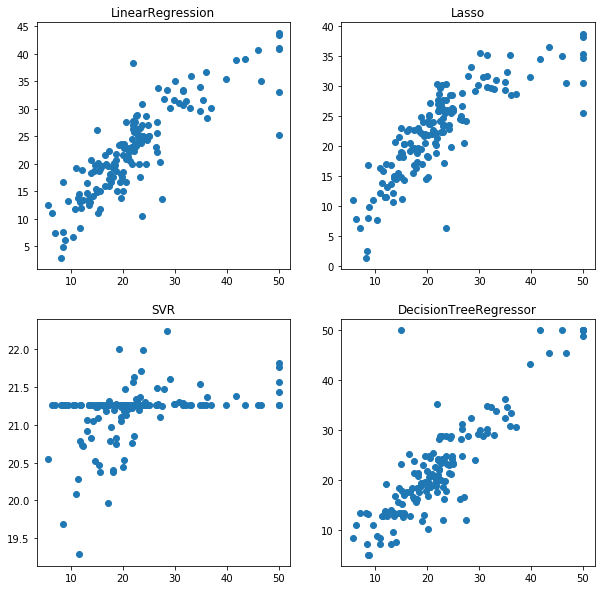

In [36]:
# change figure size
rcParams['figure.figsize'] = 10, 10
subs = (221, 222, 223, 224)

for sub, model, y_pred in zip(subs, models, y_preds):
    plt.subplot(sub)
    plt.title(str(model)[:str(model).index('(')])
    scatter(y_test, y_pred)

# Feature scaling

Feature scaling is important for gradient-based optimization algorithmes. Read [more](https://en.wikipedia.org/wiki/Feature_scaling).

In [37]:
from sklearn.preprocessing import minmax_scale

minmax_scale?

In [38]:
X_scaled = minmax_scale(df)
print(df.shape)
print(X_scaled.shape)
#print(df.CRIM)
print(X_scaled)

(506, 13)
(506, 13)
[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   2.87234043e-01
    1.00000000e+00   8.96799117e-02]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    1.00000000e+00   2.04470199e-01]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    9.89737254e-01   6.34657837e-02]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.07891832e-01]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    9.91300620e-01   1.31070640e-01]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.69701987e-01]]


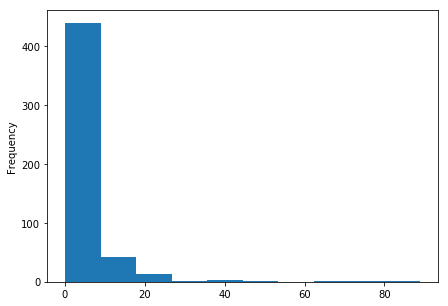

In [39]:
rcParams['figure.figsize'] = 7, 5
df['CRIM'].plot.hist()

(array([ 440.,   43.,   14.,    1.,    3.,    2.,    0.,    1.,    1.,    1.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

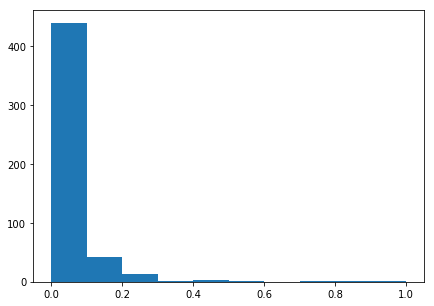

In [40]:
hist(X_scaled[:,0])

In [41]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=11)
lr_s = LinearRegression()
lasso_s = Lasso()
svr_s = SVR()
dtr_s = DecisionTreeRegressor()

models = (lr_s, lasso_s, svr_s, dtr_s)

for model in models:
    model.fit(X_train_s, y_train_s)
    
y_preds = [model.predict(X_test_s) for model in models]

for model, y_pred in zip(models, y_preds):
    print('With feature scaling: ')
    print(str(model)[:str(model).index('(')])
    print(metrics.mean_absolute_error(y_test_s, y_pred))
    print(metrics.r2_score(y_test_s, y_pred))

With feature scaling: 
LinearRegression
3.54377196382
0.726204971106
With feature scaling: 
Lasso
6.08557196359
0.217892841777
With feature scaling: 
SVR
4.6893440203
0.370777954232
With feature scaling: 
DecisionTreeRegressor
3.20197368421
0.746739335165


# Cross validation

In [48]:
from sklearn.model_selection import cross_val_score

cross_val_score?

In [43]:
cross_val_score(LinearRegression(), X, y , cv=5)

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

## the estimator's score() method is used to compute the metrics for CV

In [44]:
LinearRegression.score?

## another way of doing cross validation

In [49]:
from sklearn.model_selection import KFold

KFold?

In [46]:
k_fold = KFold(n_splits=5)
i = 1
for train, test in k_fold.split(X):
    i += 1
    lr = LinearRegression()
    
    y_pred = lr.fit(X[train], y[train]).predict(X[test])
    print(metrics.mean_absolute_error(y[test], y_pred))

2.62469523824
3.9124481746
4.38945068158
5.57366377264
4.78261236697
